# Delayed Extra Sources in NuPyCEE

Created by Benoit Côté

This notebook introduces the general delayed-extra set of parameters in NuPyCEE that allows to include any enrichment source that requires a delay-time distribution function (DTD). For example, this implementation can be used for different SNe Ia channels, for compact binary mergers, and for exotic production sites involving interactions between stellar objects.

This notebook focuses on SYGMA, but the implementation can also be used with OMEGA.

## 1. Implementation

**Here are the basic simple stellar population (SSP) inputs that need to be provided**:
- The DTD function (rate of occurence as a function of time),
- The total number of events per unit of M$_\odot$ formed,
- The yields (abundance pattern) associated with an event,
- The total mass ejected by an event (which will multiply the yields).

**Here is how these inputs are implemented in NuPyCEE** (see below for examples):

**`delayed_extra_dtd[ nb_sources ][ nb_Z ]`**

- `nb_sources` is the number of different input astrophysical site (e.g., SNe Ia, neutron star mergers, iRAWDs, etc.).
- `nb_Z` is the number of available metallicities available in the delayed-extra yields table.
- `delayed_extra_dtd[i][j]` is a 2D array in the form of [ number_of_times ][ 0-time, 1-rate ].

    The fact that we use 2D arrays provides maximum flexibility. We can then use analytical formulas, population synthesis predictions, outputs from simulations, etc..

**`delayed_extra_dtd_norm[ nb_sources ][ nb_Z ]`**

- Total number of delayed sources occurring per M$_\odot$ formed.

**`delayed_extra_yields[ nb_sources ]`**
 
- Yields table path (string) for each source.
- There is no [ nb_Z ] since the yields table can contain many metallicities.

**`delayed_extra_yields_norm[ nb_sources ][ nb_Z ]`**

- Fraction (float) of the yield table that will be eject per event, for each source and metallicity. This is the total  mass ejected per event if the yields are in mass fraction (normalized to 1).

## 2. Example with SYGMA

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from NuPyCEE import sygma

### 2.1 One deyaled extra source

In [2]:
# Create the DTD and yields information for the extra source
# ==========================================================

# Event rate [yr^-1] as a function of time [yr].
# Times need to be in order. No event will occurs before the lowest time and after the largest time.
# The code will interpolate the data point provided (in linear or in log-log space).
t = [0.0, 1.0e9, 2.0e9]  # Can be any length.
R = [1.0, 3.0, 2.0]  # This is only the shape of the DTD, as it will be re-normalized.

# Build the input DTD array
dtd = []
for i in range(0,len(t)):
    dtd.append([t[i], R[i]])
    
# Add the DTD array in the delayed_extra_dtd array.
delayed_extra_dtd = [[dtd]]
# [[ ]] for the indexes for the number of sources (here 1) and metallicities (here 1)

# Define the total number of event per unit of Msun formed.  This will normalize the DTD.
delayed_extra_dtd_norm = [[1.0e-1]]
# [[ ]] for the indexes for the number of sources (here 1) and metallicities (here 1)

# Define the yields path for the extra source
delayed_extra_yields = ['yield_tables/r_process_arnould_2007.txt']
# [ ] and not [[ ]] because the nb_Z is in the yields table as in SN Ia yields
# See yield_tables/sn1a_ivo12_stable_z.txt for an example of such yields template.

# Define the total mass ejected by an extra source
delayed_extra_yields_norm = [[1.0e-3]]

In [3]:
# Run SYGMA, one SSP with a total mass of 1 Msun at Z = 0.02
mgal = 1.0
s1 = sygma.sygma(iniZ=0.02, delayed_extra_dtd=delayed_extra_dtd, delayed_extra_dtd_norm=delayed_extra_dtd_norm,\
        delayed_extra_yields=delayed_extra_yields, delayed_extra_yields_norm=delayed_extra_yields_norm, mgal=mgal,\
        dt=1e8, special_timesteps=-1, tend=1.1*t[-1])

SYGMA run in progress..
   SYGMA run completed - Run time: 0.02s


### Let's test the total number of events and the total mass ejected by those events.

In [4]:
# Predicted number of events
N_pred = delayed_extra_dtd_norm[0][0] * mgal

# Predicted mass ejected by events
M_ej_pred = N_pred * delayed_extra_yields_norm[0][0]

# Calculated number of events
N_sim = sum(s1.delayed_extra_numbers[0])

# Calculated mass ejected by events
M_ej_sim = sum(s1.ymgal_delayed_extra[0][-1])

# Print the test
print ('The following numbers should be 1.0')
print ('   Number of events (predicted/calculated):', N_pred / N_sim)
print ('   Mass ejected by events (predicted/calculated):', M_ej_pred / M_ej_sim)

The following numbers should be 1.0
   Number of events (predicted/calculated): 1.0
   Mass ejected by events (predicted/calculated): 0.9999999999998823


### Let's plot the DTD

<IPython.core.display.Javascript object>


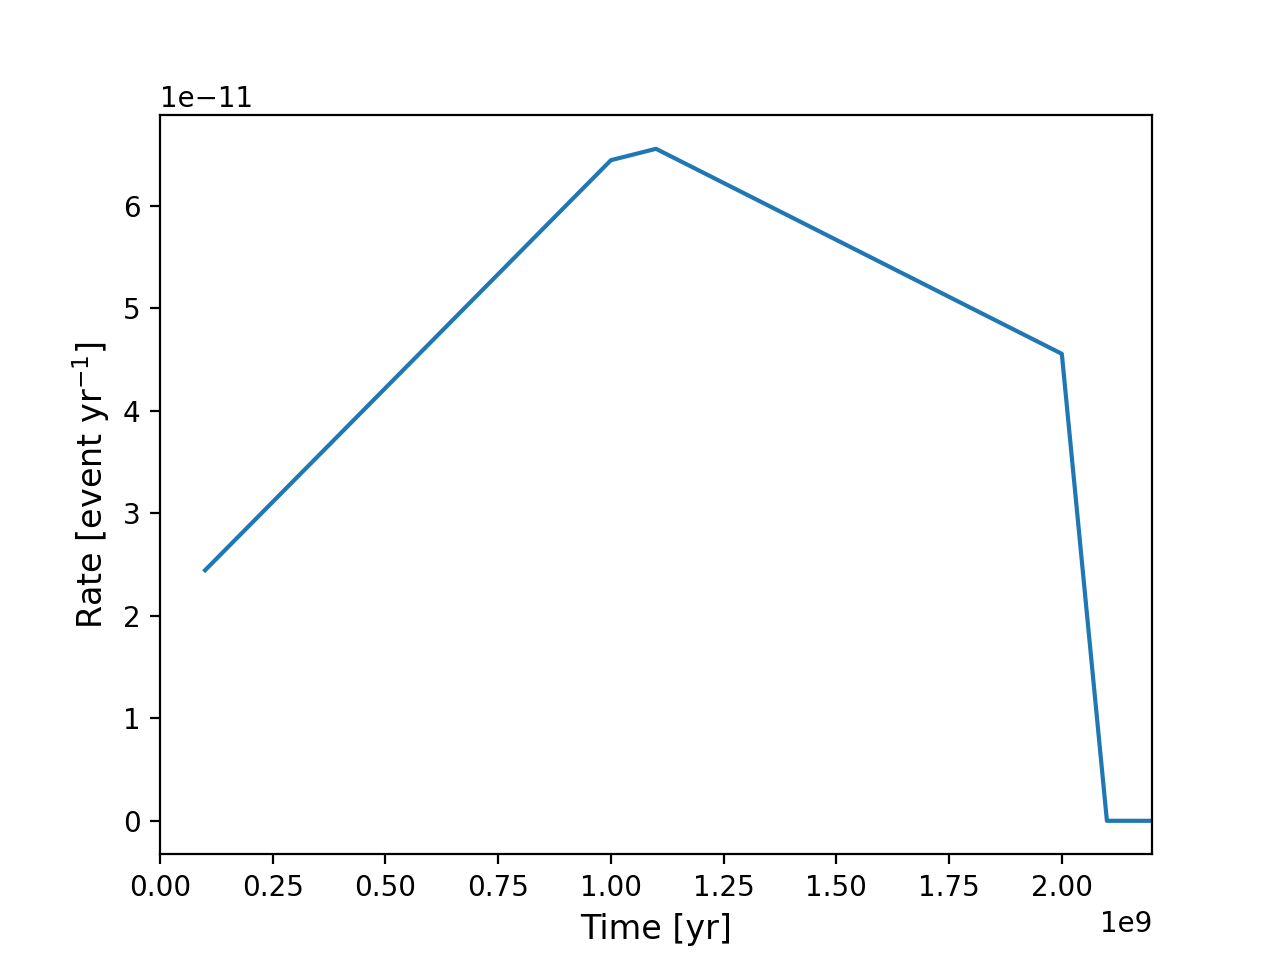

Text(0, 0.5, 'Rate [event yr$^{-1}$]')

In [7]:
%matplotlib nbagg 
plt.plot(s1.history.age[1:], np.array(s1.delayed_extra_numbers[0])/s1.history.timesteps)
plt.xlim(0, 1.1*t[-1])
plt.xlabel('Time [yr]', fontsize=12)
plt.ylabel('Rate [event yr$^{-1}$]', fontsize=12)

### 2.2 Two deyaled extra sources

In [8]:
# Create the DTD and yields information for the second extra source
# =================================================================

# Event rate [yr^-1] as a function of time [yr].
t2 = [1.4e9, 1.6e9, 1.8e9]
R2 = [4.0, 1.0, 4.0]

# Build the input DTD array
dtd2 = []
for i in range(0,len(t2)):
    dtd2.append([t2[i], R2[i]])
    
# Add the DTD array in the delayed_extra_dtd array.
delayed_extra_dtd = [[dtd],[dtd2]]

# Define the total number of event per unit of Msun formed.  This will normalize the DTD.
delayed_extra_dtd_norm = [[1.0e-2],[5.0e-3]]

# Define the yields path for the extra source
delayed_extra_yields = ['yield_tables/r_process_arnould_2007.txt','yield_tables/r_process_arnould_2007.txt']

# Define the total mass ejected by an extra source
delayed_extra_yields_norm = [[1.0e-3],[2.0e-3]]

In [9]:
# Run SYGMA, one SSP with a total mass of 1 Msun at Z = 0.02
mgal = 1.0
s2 = sygma.sygma(iniZ=0.02, delayed_extra_dtd=delayed_extra_dtd, delayed_extra_dtd_norm=delayed_extra_dtd_norm,\
        delayed_extra_yields=delayed_extra_yields, delayed_extra_yields_norm=delayed_extra_yields_norm, mgal=mgal,\
        dt=1e8, special_timesteps=-1, tend=1.1*t[-1])

SYGMA run in progress..
   SYGMA run completed - Run time: 0.02s


<IPython.core.display.Javascript object>


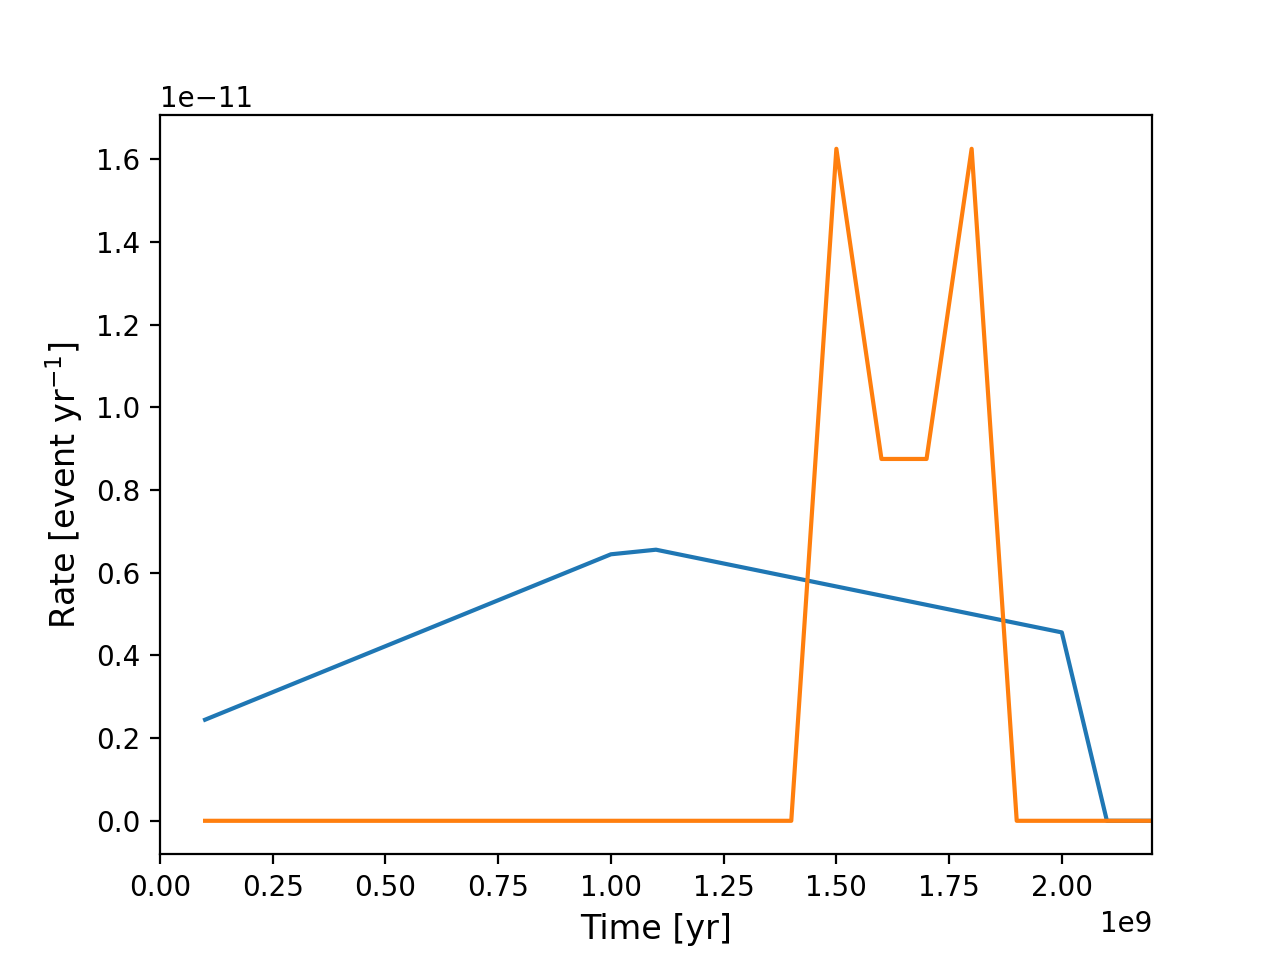

Text(0, 0.5, 'Rate [event yr$^{-1}$]')

In [10]:
%matplotlib nbagg
plt.plot(s2.history.age[1:], np.array(s2.delayed_extra_numbers[0])/s2.history.timesteps)
plt.plot(s2.history.age[1:], np.array(s2.delayed_extra_numbers[1])/s2.history.timesteps)
plt.xlim(0, 1.1*t[-1])
plt.xlabel('Time [yr]', fontsize=12)
plt.ylabel('Rate [event yr$^{-1}$]', fontsize=12)